In [1]:
!pip install scikit-learn-intelex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 7.0 MB/s eta 0:00:00


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

import pickle as pkl


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = 0)

In [9]:
data.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "ArrDel15",
                 "New_time",
                 "date",
                  "airport_code"
                 ],
        inplace=True)

In [10]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [11]:
data  = data[data['ArrDelayMinutes'] > 15]

In [12]:
data

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
1,2016,1,1,1,13,14,724,759.0,35.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
9,2016,1,1,1,13,7,705,745.0,40.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
13,2016,1,1,2,13,8,655,720.0,25.0,1.0,...,0.0,10,1024,0,24,8,36,32,64,700
14,2016,1,1,2,13,8,730,730.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700
17,2016,1,1,2,13,0,745,745.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840220,2017,4,12,3,5,3,2150,2220.0,30.0,1.0,...,2.0,9,1017,100,64,23,66,66,95,2200
1840230,2017,4,12,2,4,7,2015,2123.0,68.0,1.0,...,0.0,10,1024,77,35,7,43,43,73,2000
1840244,2017,4,12,18,4,8,1500,1705.0,125.0,1.0,...,0.0,10,1017,100,35,14,36,32,98,1500
1840264,2017,4,12,17,5,0,1959,709.0,670.0,1.0,...,0.0,10,1019,99,54,7,58,58,88,2000


In [13]:
data.reset_index(inplace=True, drop=True)

In [14]:
X = data.drop('ArrDelayMinutes', axis = 1)
y = data['ArrDelayMinutes']


In [15]:
mae_l = []
mse_l = []
rmse_l = []
r2_l = []
def Metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = mse ** 0.5
    r2 = r2_score(ytest, ypred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-Squared: ", r2)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [17]:
import time
lr_start = time.time()
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
lr_end = time.time()
print('Linear Regression : ')
Metrics(y_test, y_pred)

Linear Regression : 
MAE:  12.42536864761353
MSE:  319.4229792097845
RMSE:  17.87240832148215
R-Squared:  0.9379193869401218


In [18]:
dt_start = time.time()
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)
dt_end = time.time()
print('Decision Tree Regressor : ')
Metrics(y_test, y_pred)

Decision Tree Regressor : 
MAE:  16.910514491326687
MSE:  609.0943569753496
RMSE:  24.679837053257657
R-Squared:  0.8816210681338992


In [19]:
et_start = time.time()
extra_tree_regressor = ExtraTreesRegressor(n_jobs =-1)
extra_tree_regressor.fit(X_train, y_train)
y_pred = extra_tree_regressor.predict(X_test)
et_end = time.time()
print('Extra Tree Regressor Results')
Metrics(y_test, y_pred)

Extra Tree Regressor Results
MAE:  12.126773554000108
MSE:  298.23646803472013
RMSE:  17.269524256177995
R-Squared:  0.9420370356002207


In [20]:
rf_start = time.time()
random_forest_regressor = RandomForestRegressor(n_jobs = -1)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
rf_end = time.time()
print('Random Forest Regressor Results')
Metrics(y_test, y_pred)

Random Forest Regressor Results
MAE:  12.317139429310528
MSE:  366.4748592708363
RMSE:  19.14353309268789
R-Squared:  0.9287747425346498


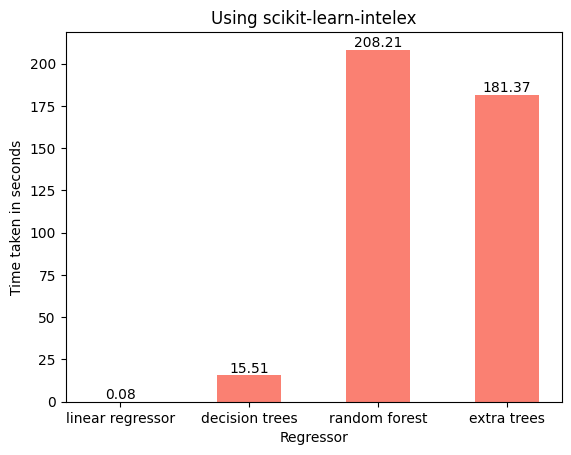

In [21]:
time = [lr_end - lr_start, dt_end - dt_start, rf_end - rf_start, et_end - et_start]
bars = plt.bar(['linear regressor', 'decision trees', 'random forest', 'extra trees'], time, width = 0.5, color = 'salmon')
plt.xlabel('Regressor')
plt.ylabel('Time taken in seconds')
plt.title('Using scikit-learn-intelex')
for bar in bars:
    height = bar.get_height()
    height = height.round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')